In [47]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras 
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt

In [48]:
(xr,yr), (xt,yt)= keras.datasets.mnist.load_data()

In [49]:
xr.shape, yr.shape, xt.shape, yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [50]:
x= xr[6]
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0145255211 31  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 32237253252 71  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 11175253252 71  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0144253252 71  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 16191253252 71  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 26221253252124 31  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0125253252252108  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0253252252108  0  0  0  0  

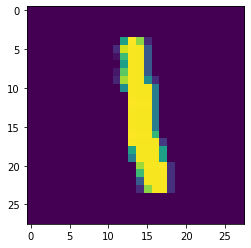

In [51]:
import matplotlib.pyplot as pl
pl.imshow(x)

In [52]:
y = yr[0]
print(y)

5


In [53]:
xr1= xr.reshape(-1, 28*28) 
xt1= xt.reshape(-1, 28*28)

In [54]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100),    
    keras.layers.Dense(10)   
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy', 
    metrics= ['accuracy']
    )

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


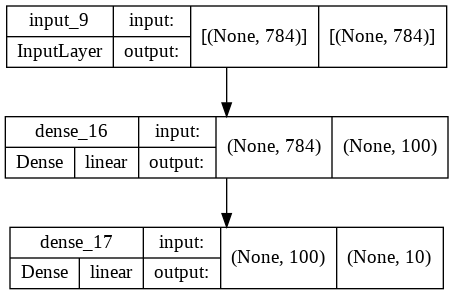

In [55]:
aModel.summary()

keras.utils.plot_model(aModel, 
    show_shapes= True, 
    show_layer_activations= True)

In [56]:
aModel.fit(xr1, yr, 
           epochs= 10, 
           batch_size= 100)

aModel.evaluate(xt1, yt)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 3.0189 - accuracy: 0.1276
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 2.3360 - accuracy: 0.1289
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 2.3083 - accuracy: 0.1148
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 2.3028 - accuracy: 0.1466
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 2.3028 - accuracy: 0.1466
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3028 - accuracy: 0.1466
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 2.3028 - accuracy: 0.1466
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3028 - accuracy: 0.1466
Epoch 9/10
600/600 [==============================] - 3s 4ms/step - loss: 2.3028 - accuracy: 0.1466
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3040 - accuracy: 0.1411

[2.3039724826812744, 0.14110000431537628]

**以下為優化的code**

In [68]:
model = Sequential()
model.add(Dense(units=512, activation='relu',input_shape=(28*28,))) 
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [70]:
y_TrainOneHot = np_utils.to_categorical(yr) 
y_TestOneHot = np_utils.to_categorical(yt)

#資料轉二維
X_train_2D = xr.reshape(60000, 28*28).astype('float32')  
X_test_2D = xt.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

In [71]:

train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)  
#計算準確率
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

Epoch 1/10
60/60 - 2s - loss: 0.5571 - accuracy: 0.8492 - val_loss: 0.2551 - val_accuracy: 0.9287 - 2s/epoch - 41ms/step
Epoch 2/10
60/60 - 2s - loss: 0.2311 - accuracy: 0.9351 - val_loss: 0.1914 - val_accuracy: 0.9470 - 2s/epoch - 32ms/step
Epoch 3/10
60/60 - 2s - loss: 0.1729 - accuracy: 0.9517 - val_loss: 0.1584 - val_accuracy: 0.9556 - 2s/epoch - 31ms/step
Epoch 4/10
60/60 - 2s - loss: 0.1378 - accuracy: 0.9614 - val_loss: 0.1372 - val_accuracy: 0.9605 - 2s/epoch - 30ms/step
Epoch 5/10
60/60 - 2s - loss: 0.1126 - accuracy: 0.9693 - val_loss: 0.1208 - val_accuracy: 0.9657 - 2s/epoch - 31ms/step
Epoch 6/10
60/60 - 2s - loss: 0.0951 - accuracy: 0.9738 - val_loss: 0.1104 - val_accuracy: 0.9667 - 2s/epoch - 31ms/step
Epoch 7/10
60/60 - 2s - loss: 0.0805 - accuracy: 0.9782 - val_loss: 0.1047 - val_accuracy: 0.9685 - 2s/epoch - 31ms/step
Epoch 8/10
60/60 - 3s - loss: 0.0689 - accuracy: 0.9816 - val_loss: 0.0990 - val_accuracy: 0.9717 - 3s/epoch - 44ms/step
Epoch 9/10
60/60 - 2s - loss: 0.